# __LINEAR REGRESSION FROM ALMOST SCRATCH__

## Introduction

#### This is a project made by me <a href="https://github.com/Rulios">Robert Lu Zheng</a> to start in this advancing and fast paced environment of ML. 

## Description

#### I'll be implementing a Linear Regression on a dataset using Pandas, NumPy. No framework, no library that has any kind of support that can scaffold this algorithm, everything from scratch (almost)

#### This Jupyter Notebook will contain all the breakdown process of what I did to build the linear regression algorithm. 

### Install libraries (optional)

In [9]:
# Install pip packages in the current Jupyter kernel
import sys

print(sys.executable)


pythonExecutable = "\"" + sys.executable + "\""

print(pythonExecutable)

!{pythonExecutable} -m pip install numpy
!{pythonExecutable} -m pip install pandas
!{pythonExecutable} -m pip install matplotlib
!{pythonExecutable} -m pip install scikit-learn


e:\Documents\AI PROJECTS\ml-algorithms-from-scratch\linear-regression-from-scratch\Scripts\python.exe
"e:\Documents\AI PROJECTS\ml-algorithms-from-scratch\linear-regression-from-scratch\Scripts\python.exe"



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Import the libraries

In [10]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random 
import sklearn.metrics as sm


### Import the dataset (as Pandas DataFrame)

In [11]:
data = pd.read_csv("./data/life-expectancy-data.csv")

### Objective

Label to predict: Life Expectancy

### Dataset notes

I use this section to take notes on the dataset when I explore it, and get a better understanding of what I'm trying to accomplish 

This dataset is extracted from <a href="https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who?resource=download">here</a>


***
Notes: 

- My gosh, this dataset has a lot of features. 
- This data ranges from 2000 to 2015
- The most correlated features with Life Expectancy are *Schooling* and *Income Composition of Resources*

Definition of the selected features as per the official source + my interpretation: 

- Schooling (0 - 20): number of years spend learning in school (or education)
- Income composition of resources (0-1): how a country utilizes its resources productively. It's based on income and availability of resources. 

***

***
Experimental notes (in ascending order): 

1) I think I'll start with Schooling as a feature to make the linear regression model. Then, if everything goes better, I'll add more features to the model

2) Ok Houston, I think we got a problem. I'm writing this after accomplishing single feature linear regression. What happens is that I chose *Income Composition of Resources* as my second feature for the multi-feature linear regression, and I'm noticing that some of the data that it's in that feature is 0.0. 

    1) Hmmm, in the last note I wrote that some of the data regarding to the feature of *Income Composition of resources* are 0.0. Which initially, I thought that it means that it had no data registered (empty). Now, after reading its definition, I think that it starts to get sense, but let me see the origin of those countries that the Income composition of resources is 0.0. 

    2) Following the last point. I printed the countries that had *Income composition of resources* of 0.0. Now, I don't want to discriminate, but I found that most of those countries aren't really accesible to gather data. And to be fair, they had data on *Life expectancy* and *Schooling*, but not on *ICOR*. So what's the next step? I'll be deleting these type of data, because 0.0 means that it the organization, in this case WHO, couldn't gather enough data to build up the *ICOR*

3) Now, because the *ICOR* has range between 0-1, it isn't necessary to normalize it. 





***


***
Results and observations: 

Note: I splitted the data in 65% to training set and 35% to test set. 

- Single Feature Linear Regression results: 
    - Feature used: Schooling
    - Label to predict: Life Expectancy 
    - Training accuracy: 93%
    - Test accuracy: 81%
    - Observations and thoughts: at first, I was confused as to why the test set accuracy was lower than 80%. I tweaked the data splitting section (initially 70-30, now 65-35) and the test accuracy improved. 
    Important mental note: although the line of the graphs between the training set and the data set are different, it doesn't mean the line is wrong or something is going wrong. Because it's taking the same intercept and slope learned from Gradient Descent. What's happening is that it's important to remember the linear formula: y = mx + b. So taking this into consideration, the line is changing because of the x, meaning it's taking the context of the data in which it's being computed. 

    

- Multiple Feature Linear Regression results: 
    - Feature used: Schooling, Income Composition of Resources
    - Label to predict: Life Expectancy
    - Training accuracy: 
    - Test accuracy: 

***

Run the cells below to get a better understanding of the dataset 

In [12]:
print(data.describe())


              Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000

In [13]:
data = pd.read_csv("./data/life-expectancy-data.csv")
print(data["Schooling"].describe())
print(data["Income composition of resources"].describe())
print(data["Life expectancy "].describe())

count    2775.000000
mean       11.992793
std         3.358920
min         0.000000
25%        10.100000
50%        12.300000
75%        14.300000
max        20.700000
Name: Schooling, dtype: float64
count    2771.000000
mean        0.627551
std         0.210904
min         0.000000
25%         0.493000
50%         0.677000
75%         0.779000
max         0.948000
Name: Income composition of resources, dtype: float64
count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: Life expectancy , dtype: float64


In [14]:
#Print correlations 

print(data.corr())

                                     Year  Life expectancy   Adult Mortality  \
Year                             1.000000          0.170033        -0.079052   
Life expectancy                  0.170033          1.000000        -0.696359   
Adult Mortality                 -0.079052         -0.696359         1.000000   
infant deaths                   -0.037415         -0.196557         0.078756   
Alcohol                         -0.052990          0.404877        -0.195848   
percentage expenditure           0.031400          0.381864        -0.242860   
Hepatitis B                      0.104333          0.256762        -0.162476   
Measles                         -0.082493         -0.157586         0.031176   
 BMI                             0.108974          0.567694        -0.387017   
under-five deaths               -0.042937         -0.222529         0.094146   
Polio                            0.094158          0.465556        -0.274823   
Total expenditure                0.09074

C:\Users\Robert\AppData\Local\Temp\ipykernel_13048\2397591091.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())



### Algorithm (single feature linear regression) 
Features: Schooling

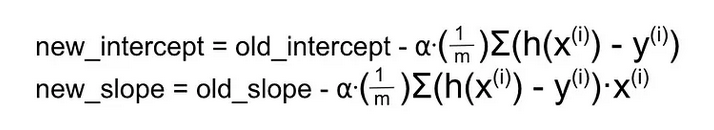

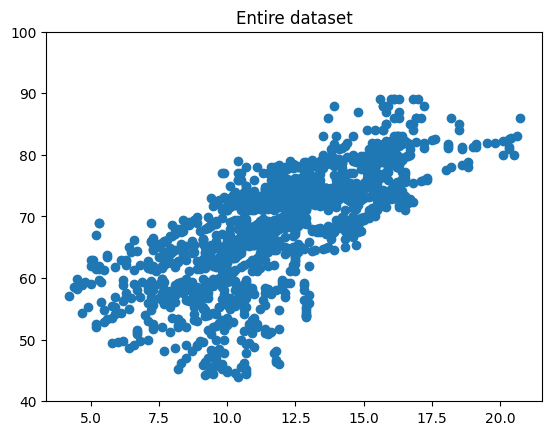

training accuracy:  93.0 %
training r2 =  0.5078328435220272


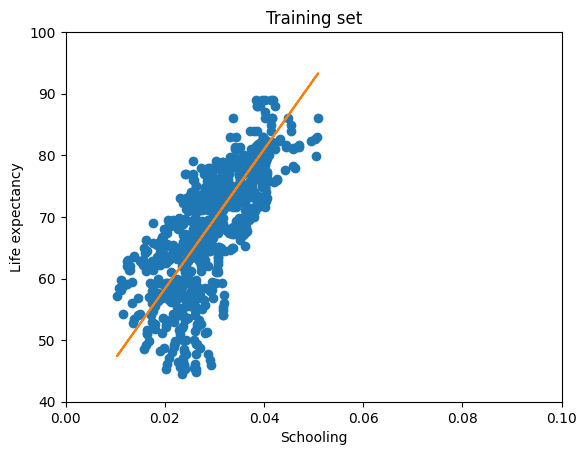

test set accuracy:  81.0 %


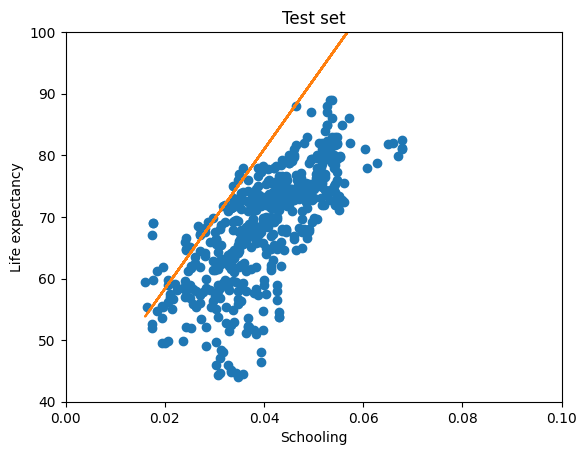

entire set accuracy:  88.0 %
35.689281982302624 1131.9846872144408
[['Brazil' 2002 'Developing' ... 3.3 0.692 0.034446158228317134]
 ['Dominican Republic' 2013 'Developing' ... 3.2 0.709
  0.03114310195984837]
 ['Tajikistan' 2005 'Developing' ... 3.9 0.572 0.02500885460412066]
 ...
 ['Turkey' 2000 'Developing' ... 5.2 0.641 0.02524478719472557]
 ['Georgia' 2003 'Developing' ... 3.0 0.684 0.027840045691379604]
 ['Bulgaria' 2000 'Developed' ... 2.5 0.709 0.030435304188033634]]


In [15]:
def initParams(): 
    
    learningRate = 0.1
    iterations = 10000

    
    #these 2 parameter may change (initialize randomly)
    slope = random.random()
    intercept = random.random()
    
    return learningRate, slope, intercept, iterations

#predicts Y
def linearRegression(b, m ,x ):
    return b + np.dot(m , x)

#mean squared error
def costfunction(length, computed, expected):
    return (1/(2*length)) * np.sum(np.power(computed - expected, 2))


def costFunctionDerivative(length, computed, expected):
    return np.sum(computed - expected) / length


def normalize(data): 
    norm = np.linalg.norm(data)
    return data / norm


#how near is the computed values are to the expected ones 
def accuracy(computed, expected): 
    return 100 - round(
                np.average(
                    np.absolute(computed - expected) / expected
                ) 
            , 2) * 100
    
def gradientDescent(trainingSet): 
    
    #here we using y = mx + b, whereas m is the slope and b the intercept
    learningRate, intercept, slope, iterations = initParams()
    
    rows, columns = np.shape(trainingSet)

    x = trainingSet[:, 1]
    y = trainingSet[:, 0]
 

    for i in range(iterations):

        newIntercept = intercept - learningRate * costFunctionDerivative(rows, linearRegression(intercept, slope, x), y)
        newSlope = slope - learningRate * costFunctionDerivative(rows, linearRegression(intercept, slope, x),  y) * np.sum(x)
        
        #print(linearRegression(b, m, x), y)
        #print("Iteration #", i)
        #print("derivative: ", costFunctionDerivative(rows, linearRegression(b, m, x), y))
        

        #update intercept and slope
        intercept = newIntercept
        slope = newSlope

   
    print("training accuracy: ", 
            accuracy(linearRegression(intercept, slope, x), y ),
            "%"
        )

    print("training r2 = ", sm.r2_score(y, linearRegression(intercept, slope, x)))

    plt.plot(x, y , "o")
    plt.plot(x, linearRegression(intercept, slope, x))
    plt.xlabel("Schooling")
    plt.ylabel("Life expectancy")
    plt.title("Training set")
    plt.ylim([40, 100])
    plt.xlim([0, 0.1])
    plt.show()

    #print("change of slope: ", mSet)

    #print("intercept=", b, "slope=", m)
    
    
    return intercept, slope 

    

#delete all the data that has null values in
# - Schooling 
# - Life expectancy 

data = pd.read_csv("./data/life-expectancy-data.csv")
columns = list(data.columns.values)

#print(columns)

#remove rows with empty values (this should be reviewed in the future, since probably this can cause a hurdle)
data = data.dropna()

#convert it into an np array to perform math calc
data = np.array(data)

#get size of the data
m, n = np.shape(data)

#randomize data by shuffling it 
np.random.shuffle(data)


plt.title("Entire dataset")
plt.plot(data[:, 21], data[:, 3], "o")
plt.ylim([40, 100])

plt.show()


#divide data set
#training set = 65% of the data 
#test set = 35% of the data
training_set = data[0:int(m*.65)]
test_set = data[int(m*.65):m]


#feature scale 
""" norm = np.linalg.norm(training_set[:, 21])
training_set[:, 21] = training_set[:, 21] / norm """

training_set[:, 21] = normalize(training_set[:, 21])
                

intercept, slope = gradientDescent(training_set[:, (3, 21)])


#check how it performs with the test set 
test_set[:, 21] = normalize(test_set[:, 21])

x = test_set[:, (3, 21)][:, 1]
y = test_set[:, (3, 21)][:, 0]

print("test set accuracy: ", 
            accuracy(linearRegression(intercept, slope, x), y ),
            "%"
        )

plt.plot(x, y , "o")
plt.plot(x, linearRegression(intercept, slope, x))
plt.xlabel("Schooling")
plt.ylabel("Life expectancy")
plt.title("Test set")
plt.ylim([40, 100])
plt.xlim([0, 0.1])
plt.show()


#check how it performs with the entire data set 
data[:, 21] = normalize(data[:, 21])

x = data[:, (3, 21)][:, 1]
y = data[:, (3, 21)][:, 0]

print("entire set accuracy: ", 
            accuracy(linearRegression(intercept, slope, x), y ),
            "%"
        )

""" plt.plot(x, y , "o")
plt.plot(x, linearRegression(intercept, slope, x))
plt.xlabel("Schooling")
plt.ylabel("Life expectancy")
plt.title("Entire data set")
plt.ylim([40, 100])
plt.xlim([0, 0.1])
plt.show()

 """
print(intercept, slope)
print(test_set)


# Life expectancy is in index 3
# Schooling is in index 21

#print(m, n)







### Algorithm (multiple feature linear regression) 
Features: Schooling, Income Composition of Resources


In [20]:
def initParams(): 
    
    learningRate = 0.1
    iterations = 15000

    
    #two features
    slopes = np.random.rand(2, 1)
    intercept = random.random()
    
    return learningRate, slopes, intercept, iterations

#predicts Y
def linearRegression(b, slopes ,x ):

    #should review x, because how it'll be managed
    result =  b + np.matmul(np.transpose(slopes), np.transpose(x))

    return np.transpose(result)

#mean squared error
def costfunction(length, computed, expected):
    return (1/(2*length)) * np.sum(np.power(computed - expected, 2))


def costFunctionDerivative(length, computed, expected):
    return np.sum(computed - expected) / length


def normalize(data): 
    norm = np.linalg.norm(data)
    return data / norm


#how near is the computed values are to the expected ones 
def accuracy(computed, expected): 
    return 100 - round(
                np.average(
                    np.absolute(computed - expected) / expected
                ) 
            , 2) * 100
    
def gradientDescent(trainingSet): 
    
    #here we using y = mx + b, whereas m is the slope and b the intercept
    learningRate, slopes, intercept, iterations = initParams()
    
    rows, columns = np.shape(trainingSet)

    x = trainingSet[:, (1, 2)]
    y = trainingSet[:, 0]
    y = np.reshape(y, (rows, 1))


    #print(np.shape(linearRegression(intercept, slopes, x)))
  
 

    for i in range(iterations):

        newIntercept = intercept - learningRate * costFunctionDerivative(rows, linearRegression(intercept, slopes, x), y)
        newSlopes = np.copy(slopes)
        for j in range(len(slopes)):
            newSlopes[j] = slopes[j] - learningRate * costFunctionDerivative(rows, linearRegression(intercept, slopes, x),  y) * np.sum(x[j])
        
        #print(linearRegression(b, m, x), y)
        #print("Iteration #", i)
        #print("derivative: ", costFunctionDerivative(rows, linearRegression(b, m, x), y))
        

        #update intercept and slope
        intercept = newIntercept
        slopes = newSlopes
   
    print("training accuracy: ", 
            accuracy(linearRegression(intercept, slopes, x), y ),
            "%"
        )

    print("training r2 = ", sm.r2_score(y, linearRegression(intercept, slopes, x)))

    #print("change of slope: ", mSet)

    #print("intercept=", b, "slope=", m)

    return intercept, slopes

    

#delete all the data that has null values in
# - Schooling 
# - Life expectancy 

data = pd.read_csv("./data/life-expectancy-data.csv")
columns = list(data.columns.values)

#print(columns)

#remove rows with empty values (this should be reviewed in the future, since probably this can cause a hurdle)
data = data.dropna()

#convert it into an np array to perform math calc
data = np.array(data)

#get size of the data
m, n = np.shape(data)

#randomize data by shuffling it 
np.random.shuffle(data)

#some of the countries don't have ICOR values. Those will be filtered. 
countriesWithoutICOR = np.where(data[:, 20] == 0)
data = np.delete(data, countriesWithoutICOR, axis=0)






#divide data set
#training set = 65% of the data 
#test set = 35% of the data
training_set = data[0:int(m*.65)]
test_set = data[int(m*.65):m]


#feature scale (just for the Schooling feature)
training_set[:, 21] = normalize(training_set[:, 21])
                

intercept, slopes = gradientDescent(training_set[:, (3, 20, 21)])



#label scale (just for the Schooling feature)
test_set[:, 21] = normalize(test_set[:, 21])
print("test accuracy: ", 
            accuracy(linearRegression(intercept, slopes, test_set[:, (21, 20)]), test_set[: , 3] ),
            "%"
        )

print("test r2 = ", sm.r2_score(test_set[: , 3], linearRegression(intercept, slopes, test_set[:, (21, 20)])))

# Life expectancy is in index 3
# Schooling is in index 21

#print(m, n)






training accuracy:  94.0 %
training r2 =  0.6600279335663983
test accuracy:  87.0 %
test r2 =  0.6788214442289383
